# Day 8, Exploratory Data Analysis I

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

Check the AirBnb Database for inconsistencies and errors. Have a database close to the original, just have few or no errors. 

In [2]:
bnbs = pd.read_csv("data/airbnb.csv")
bnbs.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [3]:
bnbs.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

In [4]:
#Part 1: Initial Processing (remove duplicates, rename cols)

#1. Check if there are repeats of the same room_id by the same host_id
#Do a count check on the Falses for the rows of the dataframe
clean_bnbs = bnbs.duplicated(["room_id", "host_id"]).value_counts()

#new_bnbs = bnbs.groupby(["room_id","host_id"]).size()
clean_bnbs

#result gives 13232: no duplicated rooms by the same airbnb owner

False    13232
dtype: int64

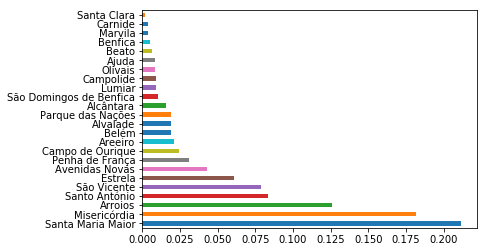

In [18]:
#Part 2: Neighbourhood Classification

#1. Check percentage of airbnb that have presence in the neighbourhoods, plot the horizontal graphs
bnbs.neighborhood.value_counts(normalize = True).plot.barh();


In [16]:
#Check on the rows if there's any row that has any missing data

n_records = len(bnbs)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(bnbs)

#All the centres return a 0 except for overall_satisfaction. Missing data is pretty low in percentage. 


room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [6]:
#Indicates for outliers in the columns of the bnbs dataframe

from scipy import stats
import numpy as np
import sys
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(bnbs)

#Helps indicate the columns where there are outliers
#Try boxplotting them to see what they actually are
#Reviews has the highest number of outliers

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


Of the columns to work with, the best 2 are reviews and price. 

Bedrooms --> A high number of bedrooms are valid, there would be individuals who rent out huge houses with many rooms
Accomodates --> Same reasoning as the bedrooms. If the bedroom number is high, then it certainly can accomodate many more people

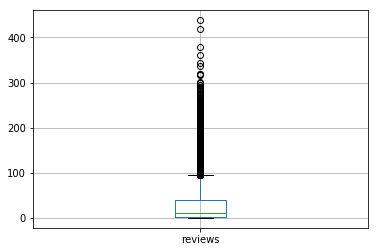

In [19]:
#boxplot for reviews to see a visualisation on them
bnbs.boxplot(column='reviews')
plt.show()

In [56]:
#Set the number of reviews as relative number of reviews
num_reviews = bnbs["reviews"]

bnbs["relative_reviews"] = "None"
bnbs["relative_reviews"][(num_reviews<100)] = "Few have Bnb-ed here"
bnbs["relative_reviews"][(num_reviews>=100)] = "Many have Bnb-ed here"
bnbs["relative_reviews"][(num_reviews>200)] = "Loads have Bnb-ed here"

C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [57]:
#Add this as a new column in the bnb dataframe
bnbs.relative_reviews = bnbs.relative_reviews.astype("category")


In [59]:
bnbs.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,relative_reviews
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,Few have Bnb-ed here
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,Few have Bnb-ed here
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,Few have Bnb-ed here
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,Loads have Bnb-ed here
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,Many have Bnb-ed here
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,Few have Bnb-ed here
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,Few have Bnb-ed here
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,Few have Bnb-ed here
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,Few have Bnb-ed here
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,Few have Bnb-ed here


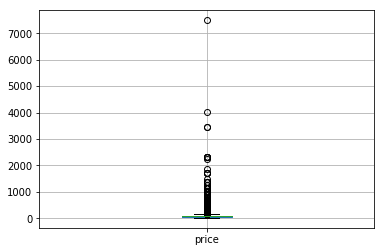

In [88]:
#boxplot for reviews to see a visualisation on them
bnbs.boxplot(column='price')
plt.show()

In [89]:
#Set the number of reviews as relative number of reviews
price_rating = bnbs["price"]

bnbs["price_rating"] = "None"
bnbs["price_rating"][(price_rating<250.0)] = "Pocket Friendly"
bnbs["price_rating"][(price_rating>=250.0)] = ""
bnbs["price_rating"][(price_rating>500.0)] = "$$$"

C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ragini\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [90]:
#Add this as a new column in the bnb dataframe
bnbs.price_rating = bnbs.price_rating.astype("category")


In [91]:
bnbs.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,relative_reviews,price_ratings,price_rating
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,Few have Bnb-ed here,$,$
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,Few have Bnb-ed here,$,$
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,Few have Bnb-ed here,$,$
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,Loads have Bnb-ed here,$,$
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,Many have Bnb-ed here,$,$
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,Few have Bnb-ed here,$$$,$$$
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,Few have Bnb-ed here,$,$
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,Few have Bnb-ed here,$,$
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,Few have Bnb-ed here,$,$
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,Few have Bnb-ed here,$,$


In [92]:
#Remove the last repeated column
bnbs = bnbs.drop(["price_rating"], axis=1)
bnbs.head(4)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,relative_reviews,price_ratings
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,Few have Bnb-ed here,$
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,Few have Bnb-ed here,$
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,Few have Bnb-ed here,$
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,Loads have Bnb-ed here,$


In [93]:
#Save this new dataframe into a new csv file (Use for Day 9)

bnbs.to_csv("airbnb_new_cols.csv")